# BIA-652 Assignment 1. Intro to Pandas

Note: Please **DO NOT** share your answers with anyone, including uploading to Github, Course Hero, etc. 

###  Name: Puneeth Sai Panuganti


In [1]:
import numpy as np #numerical computation
import pandas as pd #processing dataframes

Use the `RegularSeasonCompactResults` data to answer the following questions:  

In [2]:
# Download example data set
import urllib.request
from zipfile import ZipFile

urllib.request.urlretrieve("http://fengmai.net/download/data/bia652/pandas_data.zip", 
                           "pandas_data.zip")
ZipFile("pandas_data.zip").extractall()
df = pd.read_csv('data/RegularSeasonCompactResults.csv')

__Q1: Create a new column `total_score` as the sum of Wscore and Lscore.__ 

In [3]:
print(df.head())
#Total score
df["total_score"] = df["Wscore"] + df["Lscore"]
print("*************************")
print("Displaying final output")
print("*************************")
print(df.head())

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985      20   1228      81   1328      64    N      0
1    1985      25   1106      77   1354      70    H      0
2    1985      25   1112      63   1223      56    H      0
3    1985      25   1165      70   1432      54    H      0
4    1985      25   1192      86   1447      74    H      0
*************************
Displaying final output
*************************
   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  total_score
0    1985      20   1228      81   1328      64    N      0          145
1    1985      25   1106      77   1354      70    H      0          147
2    1985      25   1112      63   1223      56    H      0          119
3    1985      25   1165      70   1432      54    H      0          124
4    1985      25   1192      86   1447      74    H      0          160


__Q2: What is the min, max, average, and median of the total_score?__ 

In [4]:
#Minimum of Total Score
df.total_score.min() 

62

In [5]:
#Maximum of Total Score
df.total_score.max()

331

In [6]:
#Average of Total Score
df.total_score.mean()

141.0973301488757

In [7]:
#Median of Total Score
df.total_score.median()

140.0

__Q3: Find the average total score for each year (season).__ 

In [8]:
#Average Total score by year
df_total_score_by_year = df.groupby(by="Season").total_score.mean().reset_index()
df_total_score_by_year.head()

,Season,total_score
0,1985,138.583356
1,1986,138.447528
2,1987,144.764496
3,1988,147.470796
4,1989,151.259351


__Q4: Plot a time series plot of average total score by year (season)__ 

Hint: search Google for: how to plot a pandas series or [read the user guide](https://pandas.pydata.org/docs/user_guide/visualization.html)


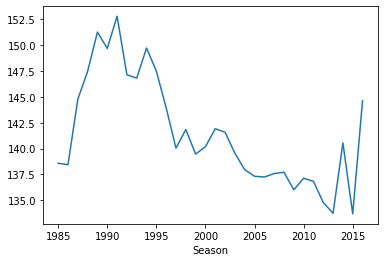

In [9]:
#Importing Libraries
%matplotlib inline
from matplotlib import pyplot as plt

#Plot for Avg Total score by year

df.groupby(by="Season").total_score.mean().plot();

__Q5: Which year has the highest percentage of blowout games, which is defined as a winning margin of at least 30 points?__ 



In [10]:
# Adding column for Win margin and assigning value of win vs lose score to the column
df["win_margin"] = df["Wscore"] - df["Lscore"]

In [11]:
# Adding column and initializing it with zero
# The column will have a value of 1 if the win margin is a blowout i.e. 30 or over as difference
df["blowout_ind"] = 0

In [12]:
# Assigning value of 1 to wherever applicable
df.loc[df.win_margin>=30, "blowout_ind"] = 1

In [13]:
df_years_by_blowout = df.groupby(by="Season").blowout_ind.sum().reset_index()

In [14]:
# Finding the value of the year where the blowout was the maximum
df_years_by_blowout[df_years_by_blowout.blowout_ind == df_years_by_blowout.blowout_ind.max()]["Season"]

23    2008
Name: Season, dtype: int64

**Q6: For each team and season combination,   
a) find the average number of points scored by the team per game in each season;  
b) plot the average points scored by team 1461 by year.**

Hint: This requires you to consider both the case when the team won (Wscore) and when the team lost (Lscore).  
Your answer for each team-year combination should be between Wscore_when_winning and Lscore_when_losing in the last dataframe of the tutorial. 

In [15]:
# Adding a column to keep count of the number of games and initializing it to a value of 1
df["count"] = 1

In [16]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,total_score,win_margin,blowout_ind,count
0,1985,20,1228,81,1328,64,N,0,145,17,0,1
1,1985,25,1106,77,1354,70,H,0,147,7,0,1
2,1985,25,1112,63,1223,56,H,0,119,7,0,1
3,1985,25,1165,70,1432,54,H,0,124,16,0,1
4,1985,25,1192,86,1447,74,H,0,160,12,0,1


In [17]:
# Creating dataframe for score for winning games by grouping using Season and team 
df_win_team_scores = df.groupby(by=["Season", "Wteam"])["Wscore", "count"].sum().reset_index();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [18]:
# Creating dataframe for score for losing games by grouping using Season and team 
df_losing_team_scores = df.groupby(by=["Season", "Lteam"])["Lscore", "count"].sum().reset_index();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [19]:
df_win_team_scores.head()

,Season,Wteam,Wscore,count
0,1985,1102,355,5
1,1985,1103,632,9
2,1985,1104,1514,21
3,1985,1106,751,10
4,1985,1108,1631,19


In [20]:
df_losing_team_scores.head()

,Season,Lteam,Lscore,count
0,1985,1102,1159,19
1,1985,1103,772,14
2,1985,1104,541,9
3,1985,1106,968,14
4,1985,1108,444,6


In [21]:
# Merging the dataframes created above "df_win_team_scores" and "df_losing_team_scores" to further compute the average
# Merge is performed on columns Seson and team.
mearged_df = pd.merge(df_win_team_scores, df_losing_team_scores, left_on= ['Season', 'Wteam'], right_on= ['Season', 'Lteam'] )

In [22]:
mearged_df.head()

,Season,Wteam,Wscore,count_x,Lteam,Lscore,count_y
0,1985,1102,355,5,1102,1159,19
1,1985,1103,632,9,1103,772,14
2,1985,1104,1514,21,1104,541,9
3,1985,1106,751,10,1106,968,14
4,1985,1108,1631,19,1108,444,6


In [23]:
# Computing the total score and the total number of games for a team split yearwise
mearged_df["Total_Score"] = mearged_df["Wscore"] + mearged_df["Lscore"]
mearged_df["Total_Games"] = mearged_df["count_x"] + mearged_df["count_y"]
mearged_df['Team'] = mearged_df["Wteam"]

In [24]:
#Calculating the average
mearged_df["Avg_Score"] = mearged_df["Total_Score"]/mearged_df["Total_Games"]

In [25]:
mearged_df.head()

,Season,Wteam,Wscore,count_x,Lteam,Lscore,count_y,Total_Score,Total_Games,Team,Avg_Score
0,1985,1102,355,5,1102,1159,19,1514,24,1102,63.083333
1,1985,1103,632,9,1103,772,14,1404,23,1103,61.043478
2,1985,1104,1514,21,1104,541,9,2055,30,1104,68.500000
3,1985,1106,751,10,1106,968,14,1719,24,1106,71.625000
4,1985,1108,1631,19,1108,444,6,2075,25,1108,83.000000


In [26]:
#Creating a seperate dataframe to view the results
df_Final_output = mearged_df[['Season', 'Team', 'Total_Score', 'Total_Games', 'Avg_Score']]

In [27]:
df_Final_output.tail()

,Season,Team,Total_Score,Total_Games,Avg_Score
10164,2016,1460,2265,33,68.636364
10165,2016,1461,2110,30,70.333333
10166,2016,1462,2603,32,81.343750
10167,2016,1463,2011,27,74.481481
10168,2016,1464,2269,30,75.633333


In [28]:
# For plotting purposes, creating a dataframe with columns that are required.
df_plot = df_Final_output[df_Final_output.Team == 1461][["Season", "Avg_Score"]]

In [29]:
df_plot.head()

,Season,Avg_Score
278,1985,63.576923
560,1986,68.586207
849,1987,70.500000
1139,1988,75.866667
1432,1989,72.806452


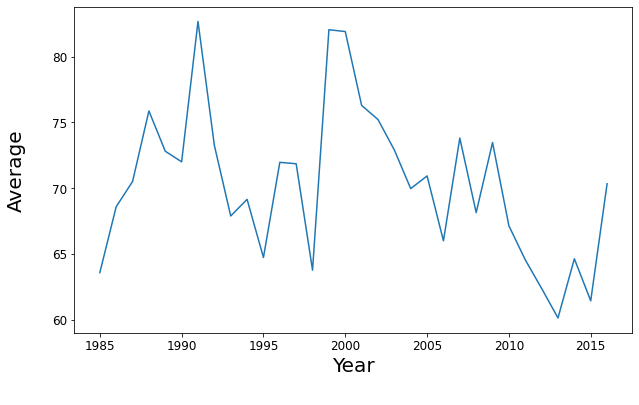

In [30]:
# Plotting the graph where x-axis is the year and y-axis is the value
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Year\n', fontsize = 20)
plt.ylabel('Average\n', fontsize = 20)

ax.plot(df_plot.Season, df_plot.Avg_Score);